# Corpora and lexical ressources for food security

S. Valentin - 04/2023

In [ ]:
import pandas as pd
import regex as re
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x000001DBB29652A0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\valentin\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['re']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
def string_found(kw, txt):
    """
        Parameters
        ----------
        kw : str
            The keyword to search
        txt : str
            The string to search into

        Returns
        -------
        str
            The matched keywords and number of occurrences
    """
    sg = re.findall(r"\b" + re.escape(kw) + r"\b", txt)
    pl = re.findall(r"\b" + re.escape(kw) + "s"+ r"\b", txt)
    if kw[-1] == 's':
        kws = kw[:-1]
        sg2 = re.findall(r"\b" + re.escape(kws) + r"\b", txt)
    else:
        sg2 = []
    occ = sg + pl + sg2
    if len(occ) >= 1:
        return('{} ({})'.format(kw, len(occ)))
    else:
        return("")

def list_string_found(kw, txt):
    """
        Parameters
        ----------
        kw : list
            A list of keywords to search
        txt : str
            The string to search into

        Returns
        -------
        str
            The matched keywords and number of occurrences
    """
    f = ""
    for k in kw:
        matches = string_found(k, txt)
        if len(matches) > 0:
            if len(f) > 0 :
                f = f + " / {}".format(matches)
            else:
                f = matches
    return(f)

def df_freq(l, colnames = ["fr", "freq"]):
    """
        Parameters
        ----------
        l : list
            List of sets (keyword, freq)

        colnames : list, optional
            The names of the columns in the output df

        Returns
        -------
        df
            Dataframe of the matched keywords and their frequency
    """
    nb = sum([x[1]for x in l])
    kw = [x[0]for x in l]
    freq = [x[1]*100/nb for x in l]
    df = pd.DataFrame({"kw" : kw, "freq" : freq})
    df.columns = colnames
    return(df)

def freq_lexicon(lex, txt):
    """
        Parameters
        ----------
        lex : list
            Lexicon
        txt : str
            The string to search into

        Returns
        -------
        dict
            The matched keywords and number of occurrences
    """
    string_found = [list_string_found(lex, x) for x in txt]
    string_found = " / ".join(string_found)
    w = [k.split(" (")[0] for k in string_found.split(" / ") if len(k) >1]
    f = [int(k.split(" (")[1].replace(")", "")) for k in string_found.split(" / ") if len(k) >1]
    unique_w = list(set(w))
    dic_freq, dic_freq_doc = {}, {}
    for word in unique_w:
        idx = [i for i, j in enumerate(w) if j == word]
        freq = sum([f[i] for i in idx])
        freq_doc = w.count(word)
        dic_freq_doc[word] = freq_doc
        dic_freq[word] = freq
    ordered_dic = sorted(dic_freq.items(), key=lambda x:x[1], reverse=True)
    ordered_dic_doc = sorted(dic_freq_doc.items(), key=lambda x:x[1], reverse=True)
    return({'occurrences': ordered_dic, 'doc': ordered_dic_doc})

# 1. The lexicons

### Expert lexicon (FR)

Available at: https://dataverse.cirad.fr/dataset.xhtml?persistentId=doi:10.18167/DVN1/C5PU01.
<br>
N.B. The version herebelow is a slightly modified version of the one available on Dataverse (minor spelling corrections, duplicate removal, manual categorisation of keyword concepts to match the ones from Fraiberger)

This French lexicon was built in the context of Hugo Deléglise's PhD. It consists of 3 sets of keywords on food security and crises adapted to the context of Burkina Faso over the period 2009-2018 created by several food security experts: a general lexicon on food security consisting of 21 expressions (LEXG); a detailed lexicon on food security consisting of 84 expressions (LEXA); a detailed lexicon on crises consisting of 83 expressions (LEXC) (2021-08-30).

In [ ]:
expert_lexicon = pd.read_excel('D:/Mes Donnees/Data/Lexiques/expert.xlsx')
expert_lexicon_conv = pd.read_excel('D:/Mes Donnees/Data/Lexiques/expert.xlsx', sheet_name = "category")
expert_G = list(set([w for w in expert_lexicon['LEXG'].tolist() if str(w) != 'nan']))
expert_A = list(set([w for w in expert_lexicon['LEXA'].tolist() if str(w) != 'nan']))
expert_C = list(set([w for w in expert_lexicon['LEXC'].tolist() if str(w) != 'nan']))

In [ ]:
len(list(set(expert_G+expert_A+expert_C)))

127

### KEOPS lexicon (FR)

Available at: https://doi.org/10.18167/DVN1/D1C53L.

This lexicon in French was built in the context of project LEAP4FNSSA (Long-term EU-AU Research and Innovation Partnership for Food and Nutrition Security and Sustainable Agriculture), to feed the Knowledge Extractor Pipeline System (KEOPS). The lexicon is composed of 331 keywords associated with 12 concepts (among which 22 keywords specifically about food security domain) is the result of 3 steps of work and brainstorming.

In [ ]:
keops_lexicon = pd.read_excel('D:/Mes Donnees/Data/Lexiques/KEOPS.xlsx', sheet_name = "Food_security_bilingual")

In [ ]:
keops_lexicon_fr = list(set(keops_lexicon['fr']))
keops_lexicon_fr = [x.lower().strip() for x in keops_lexicon_fr]
keops_lexicon_en = list(set(keops_lexicon['en']))
keops_lexicon_en = [x.lower().strip() for x in keops_lexicon_en]

In [ ]:
len(keops_lexicon_fr)

22

### Fraiberger lexion (EN)

This lexicon was part of the result of a recent study about food securiy monitoring based on news: https://www.science.org/doi/10.1126/sciadv.abm3449. Keywords related to food-security risk factors were extracted from a large corpus on online news in English, using pattern-based method and word embeddings methods, and statistically filtered to obtain 164 final keywords. They were manually clustered into 12 semantic clusters. We translated them into French using online ChatGPT and manually checking the consistency.
        

In [ ]:
fraibeger_lexicon = pd.read_excel('D:/Mes Donnees/Data/Lexiques/fraiberger.xlsx', sheet_name='bilingual')
fraibeger_lexicon['en'] = fraibeger_lexicon['en'].apply(lambda x:x.lower().strip())
fraibeger_lexicon['fr'] = fraibeger_lexicon['fr'].apply(lambda x:x.lower().strip())
fraibeger_lexicon = fraibeger_lexicon.drop_duplicates()
fraibeger_lexicon_en = list(set(fraibeger_lexicon['en']))
fraibeger_lexicon_fr = list(set(fraibeger_lexicon['fr']))

In [ ]:
len(fraibeger_lexicon_fr)

164

## All lexicons

In [ ]:
all_lexicons = list(set(keops_lexicon_fr + list(set(expert_G+expert_A+expert_C)) + fraibeger_lexicon_fr))
len(all_lexicons)

299

# 2. Coverage between lexicons

In [ ]:
x1 = len(keops_lexicon_fr)
x2 = len(set(expert_G + expert_A + expert_C))
x3 = len(set(expert_G + expert_A + expert_C).intersection(keops_lexicon_fr))
x4 = len(set(expert_G ))
x5 = len(set(expert_G).intersection(keops_lexicon_fr))
x6 = len(set(expert_A ))
x7 = len(set(expert_A).intersection(keops_lexicon_fr))
x8 = len(set(expert_C ))
x9 = len(set(expert_C).intersection(keops_lexicon_fr))
x10 = len(keops_lexicon_en)
x11 = len(fraibeger_lexicon_en)
x12 = len(set(keops_lexicon_en).intersection(fraibeger_lexicon_en))
x13 = len(fraibeger_lexicon_fr)
x14 = len(set(expert_G + expert_A + expert_C).intersection(fraibeger_lexicon_fr))

### KEOPS vs Experts (french)

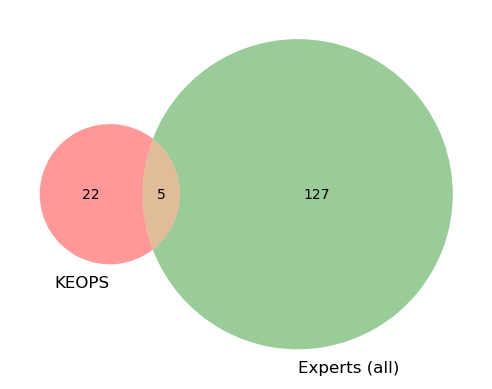

In [ ]:
venn2(subsets = (x1, x2, x3), set_labels = ('KEOPS', 'Experts (all)'))

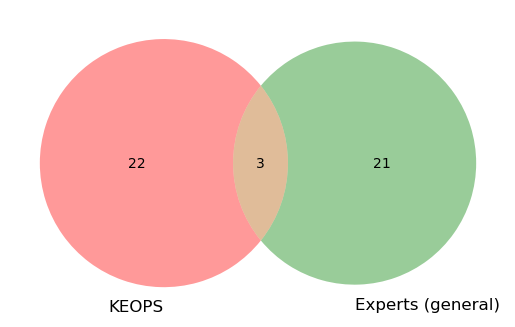

In [ ]:
venn2(subsets = (x1, x4, x5), set_labels = ('KEOPS', 'Experts (general)'))

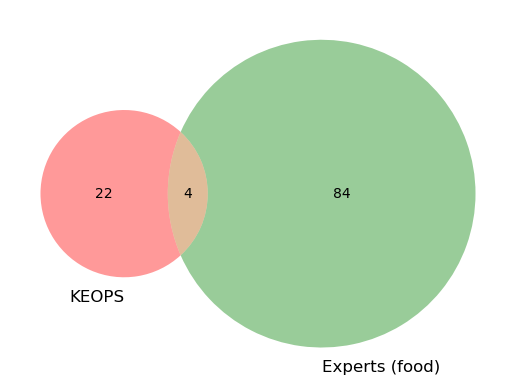

In [ ]:
venn2(subsets = (x1, x6, x7), set_labels = ('KEOPS', 'Experts (food)'))

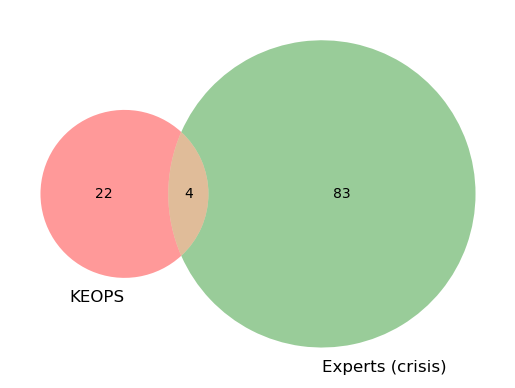

In [ ]:
venn2(subsets = (x1, x8, x9), set_labels = ('KEOPS', 'Experts (crisis)'))

Vocabulary in KEOPS not in expert lexicons :

In [ ]:
[x for x in keops_lexicon_fr if x not in set(expert_G + expert_A + expert_C)]

["système d'alerte rapide",
 'aliment nouveau',
 "accès à l'alimentation",
 'sécurité alimentaire en milieu urbain',
 'qualité nutritionnelle',
 "systèmes d'alerte rapide",
 'autosuffisance',
 'sécurité alimentaire des ménages',
 "droit à l'alimentation",
 'nouveaux aliments',
 'gestion des ressources',
 'souveraineté alimentaire',
 'sécurité alimentaire durable',
 'durabilité socio-économique',
 'intensification durable',
 'insécurité alimentaire',
 'sécurité nutritionnelle']

### Fraiberger vs Experts (french)

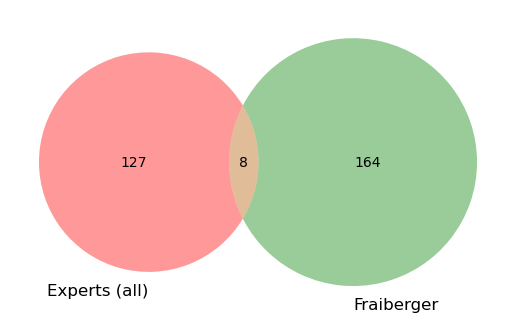

In [ ]:
venn2(subsets = (x2, x13, x14), set_labels = ('Experts (all)', 'Fraiberger'))

### KEOPS vs Fraiberger (english)

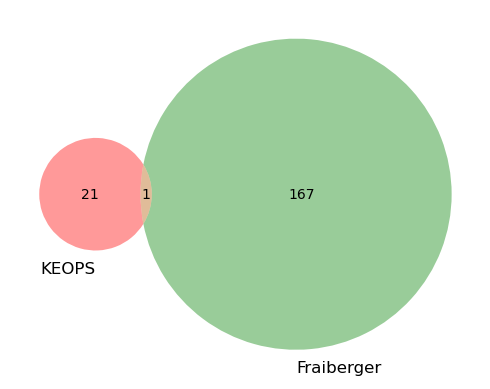

In [ ]:
venn2(subsets = (x10, x11, x12), set_labels = ('KEOPS', 'Fraiberger'))

Vocabulary in KEOPS not in fraibeger_lexicon :

In [ ]:
[x for x in keops_lexicon_en if x not in fraibeger_lexicon_en]

['malnutrition',
 'sustainable intensification',
 'hunger',
 'right to food',
 'self-sufficiency',
 'novel foods',
 'nutrition security',
 'early warning',
 'early warning systems',
 'food aid',
 'urban nutrition security',
 'household food security',
 'novel food',
 'food sovereignty',
 'resource management',
 'socioeconomic sustainability',
 'food access',
 'nutritional quality',
 'sustainable food security',
 'food security']

# 2. Coverage between lexicons and corpus

In [ ]:
data = [["FRESA corpus", 26178,"Burkina Faso, Bénin, Sénégal","2004-en cours","FR",17],
        ["BF corpus", 22856,"Burkina Faso","2009-2018","FR","2 (Burkina24, LeFaSo)"]]

In [ ]:
pd.DataFrame(data, columns=["Corpus", "No articles", "Spatial coverage", "Temporal coverage", "Language", "No of sources"]).style.hide(axis="index")

Corpuq,No articles,Spatial coverage,Temporal coverage,Language,No of sources
FRESA corpus,26178,"Burkina Faso, Bénin, Sénégal",2004-en cours,FR,17
BF corpus,22856,Burkina Faso,2009-2018,FR,"2 (Burkina24, LeFaSo)"


### FRESA corpus

In [ ]:
import glob
fresa_path = r'D:/Mes Donnees/Data/corpus_FRESA' # use your path
all_files = glob.glob(fresa_path + "/*.csv")

rows = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,encoding='utf-8')
    rows.append(df)

FRESA = pd.concat(rows, axis=0, ignore_index=True).reset_index()

# Remove article without publishing date
FRESA = FRESA.dropna(subset=['published_at'])

# Removing duplicates
FRESA = FRESA.drop_duplicates(subset=['title', 'source'])

# Creating a column indicating if the source is Youtueb or an online news
FRESA['source_norm'] = ['youtube' if 'youtube' in i else 'online news' for i in FRESA.url]

# Lowercasing the text
FRESA['text_clean'] = FRESA['text'].apply(lambda x: x.lower())

# Creating time columns for aggregating
FRESA['year_month'] = FRESA['published_at'].apply(lambda x: str(x)[0:7])
FRESA['year'] = FRESA['published_at'].apply(lambda x: int(str(x)[0:4]))
FRESA['year_month'] = pd.to_datetime(FRESA['year_month'])


FRESA_agg = FRESA.groupby(['year_month', 'source_norm'])['index'].count().reset_index()

In [ ]:
FRESA.head()

,index,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,...,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic,source_norm,text_clean
0,0,0BV7191EOS,Passer de 75% à 100% de couverture des cantine...,Passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?Passer-de-75-a-10...,FR,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,...,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Environement (m),online news,passer de 75% à 100% de couverture des cantine...
1,1,1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...,Le procès des personnes arrêtées au CNHU renvo...,https://www.24haubenin.info/?Le-proces-des-per...,FR,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,...,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Societe (m),online news,le procès des personnes arrêtées au cnhu renvo...
2,2,20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...,Nouvel enrôlement au Ravip pour les femmes et ...,https://www.24haubenin.info/?Nouvel-enrolement...,FR,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,...,NaN,NaN,1.666735e+09,yes (m),No (m),No (m),No (m),Societe (m),online news,nouvel enrôlement au ravip pour les femmes et ...
3,3,7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,https://www.24haubenin.info/?COMPTE-RENDU-DU-C...,FR,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,...,NaN,NaN,1.666735e+09,yes (m),Yes (m),Yes (m),Yes (m),Economie (m),online news,compte rendu du conseil des ministres du 26 oc...
4,4,F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022,Calendrier complet et groupes du CHAN 2022\n\n...,https://www.24haubenin.info/?Calendrier-comple...,FR,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,...,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Sport (m),online news,calendrier complet et groupes du chan 2022\n\n...


**Explanation of some columns**:
* Class labels:
    - if followed by "(u)", the news has been labelled by an expert (Chloé Choquet),
    - if followed by "(m)", the news has been labelled automatically (supervised classifier).

* CLS_Lexique Sécurité Alimentaire: similarity between the text and the expert lexicon, with a minimal threshold of 0.35 (i.e., sim >= 0.35 -> "yes").


* The "Relevance" et "Usefulness" tasks come from a classification model learned on annotated data by Chloé.

    * Relevance": 3 values (yes, no, partial)
    * Relevance Yes/No": 2 values (yes, no).



### Burkina Faso corpus

In [ ]:
filename = r'D:/Mes Donnees/Data/corpus_BF.csv' # use your path
BF = pd.read_csv(filename, index_col=None, sep = ';', header=0,encoding='utf-8').reset_index()

# Lowercasing the text
BF['text_clean'] = BF['TXT'].apply(lambda x: x.lower())

BF_agg = BF.groupby(['ANNEE'])['index'].count().reset_index()

### Timelines

In [ ]:
label_size = 12
title_size = 14

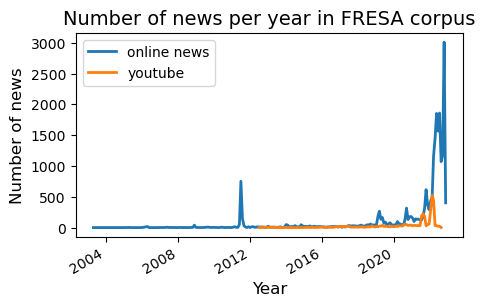

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
bp = FRESA_agg.groupby('source_norm').plot('year_month', 'index',ax=ax, marker='', linewidth=2,
                                          legend=False)
plt.title('Number of news per year in FRESA corpus', size = title_size)
plt.xlabel('Year',size=label_size)
plt.ylabel('Number of news', size = label_size)
plt.legend(labels = ['online news', 'youtube'], loc = 'upper left')
plt.show()

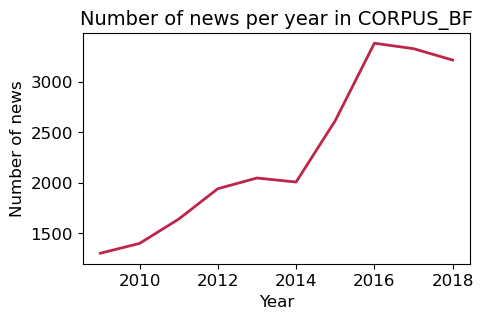

In [ ]:
figsize(5,3)
plt.plot('ANNEE', 'index', data=BF_agg, marker='', color='#be254a', linewidth=2)
plt.xlabel('Year',size=label_size)
plt.ylabel('Number of news', size = label_size)
plt.title('Number of news per year in CORPUS_BF', size = title_size)
plt.xticks(size = label_size)
plt.yticks(size = label_size)
plt.show()
#plt.xticks(['12-31',  '01-05',  '01-09',  '01-13', '01-17', '01-21', '01-25','01-28'])
#plt.grid(True)

# 4. Coverage between lexicons and corpus

## Corpus BF

### Frequency of vocabulary with lexicon from Fraiberger et al.

In [ ]:
txt = BF['text_clean'].tolist()
d = freq_lexicon(fraibeger_lexicon_fr, txt)

#### Most frequent keywords (term-frequency)

In [ ]:
d['occurrences'][0:5]

[('corruption', 2973),
 ('conflit', 2056),
 ('siège', 1725),
 ('terroriste', 1279),
 ('réfugiés', 1128)]

#### Most frequent keywords (document-frequency)

In [ ]:
d['doc'][0:5]

[('siège', 1184),
 ('conflit', 983),
 ('corruption', 787),
 ('terroriste', 687),
 ('inondations', 503)]

#### Most frequent categories (term-frequency)

In [ ]:
f_occ = df_freq(d['occurrences']).merge(fraibeger_lexicon, on=["fr"])
f_occ.groupby(['category'])['freq'].agg("sum").sort_values(ascending=False)

category
conflicts and violence            40.031898
political instability             18.121322
forced displacement               11.257768
weather shocks                     8.007480
other                              5.477644
food crisis                        4.603201
economic issues                    4.399714
pests and diseases                 3.349282
environmental issues               2.463840
humanitarian aid                   1.688390
land-related issues                0.494968
agricultural production issues     0.104493
Name: freq, dtype: float64

#### Most frequent categories (document-frequency)

In [ ]:
f_doc = df_freq(d['doc']).merge(fraibeger_lexicon, on=["fr"])
f_doc.groupby(['category'])['freq'].agg("sum").sort_values(ascending=False)

category
conflicts and violence            45.410988
political instability             11.169080
weather shocks                     8.283646
forced displacement                8.017462
food crisis                        6.260647
economic issues                    5.919932
other                              5.249148
pests and diseases                 3.204855
environmental issues               3.130324
humanitarian aid                   2.448893
land-related issues                0.713373
agricultural production issues     0.191652
Name: freq, dtype: float64

### Frequency of vocabulary with lexicon from experts (Deleglise)

In [ ]:
d2 = freq_lexicon(list(set(expert_C)), txt)

#### Most frequent keywords (term-frequency)

In [ ]:
d2['occurrences'][0:5]

[('armée', 4122),
 ('conflit', 2056),
 ('attaque', 2018),
 ('pauvreté', 1568),
 ('insécurité', 1506)]

#### Most frequent keywords (document-frequency)

In [ ]:
d2['doc'][0:5]

[('armée', 1310),
 ('attaque', 1086),
 ('pauvreté', 1013),
 ('conflit', 983),
 ('insécurité', 952)]

#### Most frequent categories (term-frequency)

In [ ]:
e_occ = df_freq(d2['occurrences']).merge(expert_lexicon_conv, on=["fr"])
e_occ.groupby(['category'])['freq'].agg("sum").sort_values(ascending=False)

category
conflicts and violence            31.691488
political instability             17.152009
economic issues                    9.946751
food crisis                        8.989933
forced displacement                6.714369
weather shocks                     5.898993
environmental issues               5.058657
pests and diseases                 4.650969
other                              4.526167
land-related issues                3.490307
humanitarian aid                   1.368666
agricultural production issues     0.511690
Name: freq, dtype: float64

#### Most frequent categories (document-frequency)

In [ ]:
e_doc = df_freq(d2['doc']).merge(expert_lexicon_conv, on=["fr"])
pd.DataFrame(e_doc.groupby(['category'])['freq'].agg("sum").sort_values(ascending=False))

,freq
category,
conflicts and violence,35.275398
economic issues,13.741330
political instability,10.697674
forced displacement,9.506324
food crisis,8.135455
weather shocks,5.924113
environmental issues,4.887801
other,4.659323
land-related issues,3.059976


<Axes: ylabel='category'>

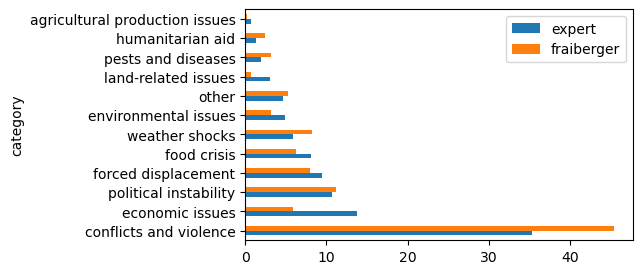

In [ ]:
df1 = pd.DataFrame(e_doc.groupby(['category'])['freq'].agg("sum")).reset_index()
df1.columns = ['category', 'expert']
df2 = pd.DataFrame(f_doc.groupby(['category'])['freq'].agg("sum")).reset_index()
df2.columns = ['category', 'fraiberger']
dfall = df1.merge(df2, on = ['category'])
dfall = dfall.set_index('category')
dfall.sort_values(by = "expert", ascending=False).plot(kind='barh')

<Axes: ylabel='category'>

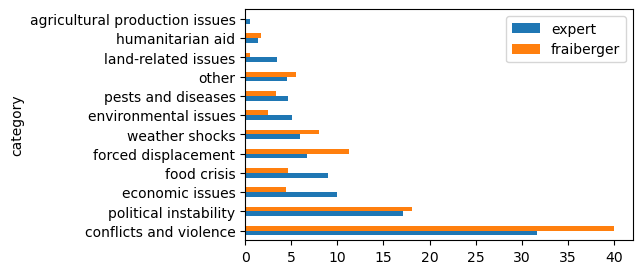

In [ ]:
df1 = pd.DataFrame(e_occ.groupby(['category'])['freq'].agg("sum")).reset_index()
df1.columns = ['category', 'expert']
df2 = pd.DataFrame(f_occ.groupby(['category'])['freq'].agg("sum")).reset_index()
df2.columns = ['category', 'fraiberger']
dfall = df1.merge(df2, on = ['category'])
dfall = dfall.set_index('category')
dfall.sort_values(by = "expert", ascending=False).plot(kind='barh')

### Corpus FRESA

In [ ]:
txt = FRESA['text_clean'].tolist()
df = freq_lexicon(fraibeger_lexicon_fr, txt)
de = freq_lexicon(list(set(expert_C)), txt)

In [ ]:
e_occ = df_freq(de['occurrences']).merge(expert_lexicon_conv, on=["fr"])
e_doc = df_freq(de['doc']).merge(expert_lexicon_conv, on=["fr"])
f_occ = df_freq(df['occurrences']).merge(fraibeger_lexicon, on=["fr"])
f_doc = df_freq(df['doc']).merge(fraibeger_lexicon, on=["fr"])

In [ ]:
f_occ = df_freq(df['occurrences']).merge(fraibeger_lexicon, on=["fr"])
f_doc = df_freq(df['doc']).merge(fraibeger_lexicon, on=["fr"])

<Axes: ylabel='category'>

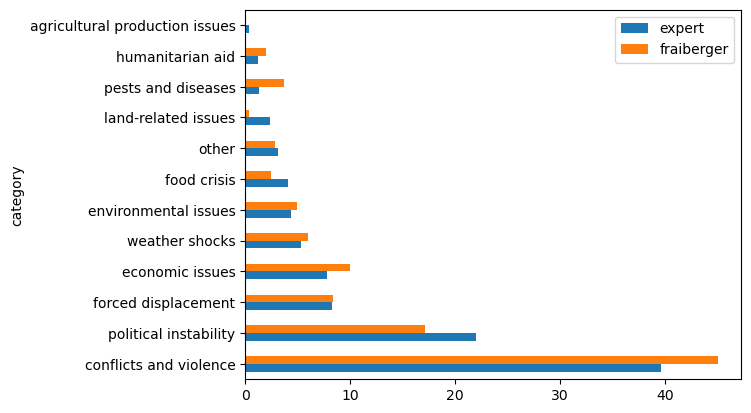

In [ ]:
df1 = pd.DataFrame(e_occ.groupby(['category'])['freq'].agg("sum")).reset_index()
df1.columns = ['category', 'expert']
df2 = pd.DataFrame(f_occ.groupby(['category'])['freq'].agg("sum")).reset_index()
df2.columns = ['category', 'fraiberger']
dfall = df1.merge(df2, on = ['category'])
dfall = dfall.set_index('category')
dfall.sort_values(by = "expert", ascending=False).plot(kind='barh')

<Axes: ylabel='category'>

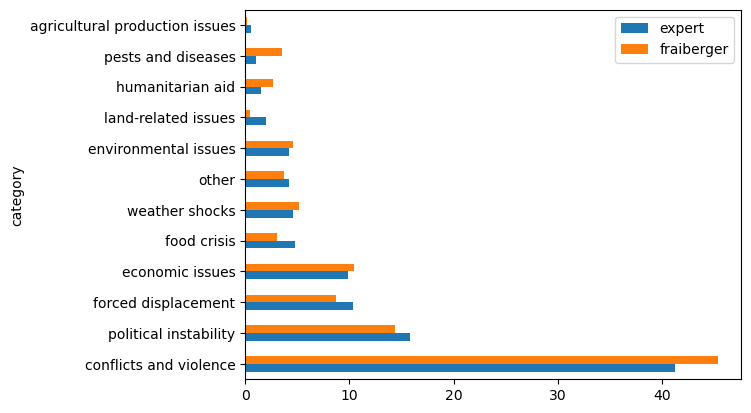

In [ ]:
df1 = pd.DataFrame(e_doc.groupby(['category'])['freq'].agg("sum")).reset_index()
df1.columns = ['category', 'expert']
df2 = pd.DataFrame(f_doc.groupby(['category'])['freq'].agg("sum")).reset_index()
df2.columns = ['category', 'fraiberger']
dfall = df1.merge(df2, on = ['category'])
dfall = dfall.set_index('category')
dfall.sort_values(by = "expert", ascending=False).plot(kind='barh')